# Breast Cancer Case Study

**Wisconson Breast Cancer dataset**

Attribute Information:
1.ID number 2. Diagnosis (M = malignant, B = benign) 3–32)

Ten real-valued features are computed for each cell nucleus:

1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter² / area — 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension (“coastline approximation” — 1)


### Rosa WANG


### September 10, 2020 

* Summary

* Data exploration and cleaning

* Exploratory Data Analysis (EDA)

* Preprocessing the dataset

* Model Selection

* conclusion

## Summary

_As one of the most common cancers among women in the world, the research of breast cancer can make a huge difference on public health. The early diagnosis of BC can improve the prognosis and chance of survival significantly, as it can promote timely clinical treatment to patients. Further accurate classification of benign tumors can prevent patients undergoing unnecessary treatments. Thus, the correct diagnosis of BC and classification of patients into malignant or benign groups is the subject of much research._ 

_Because of its unique advantages in critical features detection from complex BC datasets, machine learning (ML) is widely recognized as the methodology of choice in BC pattern classification and forecast modelling.In this Wisconson(Diagnostic)Dataset, we are going to try several machine learning classification models to achive the best accuracy as we can._

## Data exploration and cleaning

In this section we are going to explore the dataset, we start with importing all the necessary libraries we need first. Then we visualize the dataset.Visualization of data is an imperative aspect of data science. It helps to understand data and also to explain the data to another person.In this tutorial we will use pandas’ visualization which is built on top of matplotlib, to find the data distribution of the features.

visualization libraries we will be using in this analysis:
* matplotlib
* seaborn

In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [251]:
dataset=pd.read_csv('data.csv')

Examine the dataset using the pandas head()method, we can observe that the dataset has 32 columns.‘Diagnosis’ is the column which we are going to predict, which says if the cancer is M = malignant or B = benign. 1 means the cancer is malignant and 0 means benign.

We can identify that out of the 569 persons, 357 are labeled as B (benign) and 212 as M (malignant).

In [252]:
dataset.keys()

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [253]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [254]:
dataset.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [255]:
dataset=dataset.drop('Unnamed: 32', 1)

In [256]:
print('dataset dimensions :{}'.format(dataset.shape))

dataset dimensions :(569, 32)


### Missing or Null Data points
Missing data (or missing values) is defined as the data value that is not stored for a variable in the observation of interest. The problem of missing data is relatively common in almost all research and can have a significant effect on the conclusions that can be drawn from the data
Even in a well-designed and controlled study, missing data occurs in almost all research. Missing data can reduce the statistical power of a study and can produce biased estimates, leading to invalid conclusions. Taking care of missing data is an important step in all kinds of data science work.

There is no missing data in this dataset, then we are safely move to next step>

In [257]:
dataset.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [258]:
dataset.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [259]:
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Exploratory Data Analysis (EDA)

While there are an almost overwhelming number of methods to use in **EDA**, one of the most effective starting tools is the pairs plot (also called a scatterplot matrix).

A pairs plot allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis and, fortunately, are easily implemented in Python!In this section we will be using some python visualization. 

/Users/rosawang/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


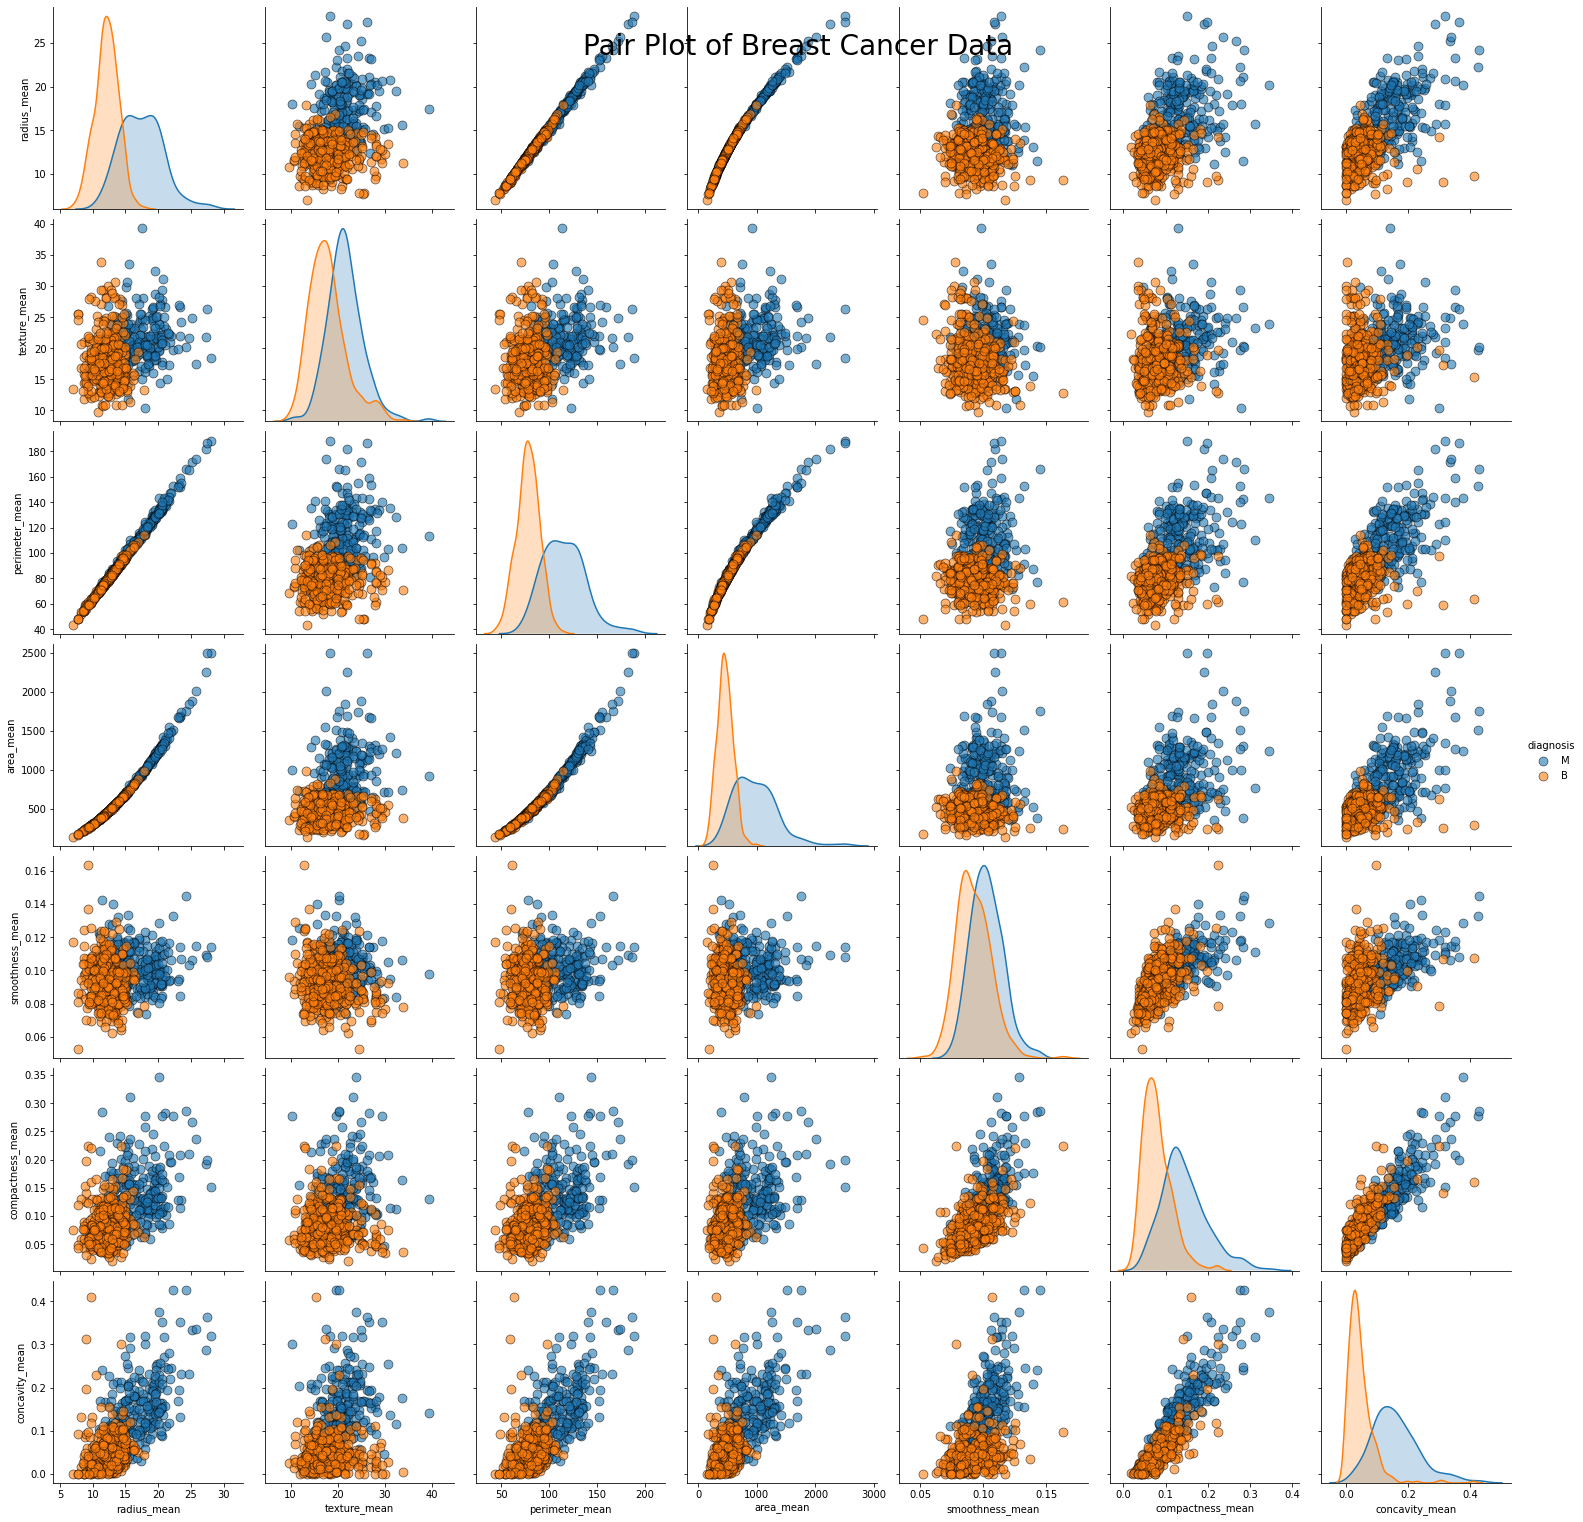

In [260]:
sns.pairplot(dataset, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean','area_mean', 'smoothness_mean','compactness_mean','concavity_mean'],
   diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size = 3)
plt.suptitle('Pair Plot of Breast Cancer Data', 
             size = 28);

I chose 7 of all the varibles in the dataset to make pair plot, from all the subplots above we can summarize some of the characteristics and impove our analysis in the next step
* there is a positive correlation between radius, parameter and area, so we are going to only keep one of them as a variable in the next step
* in general, malignant cancer tend to appear on the right above of the plots, which means those indexes of malignant cancer are usually bigger than benign cancer, we will explore that in the next step

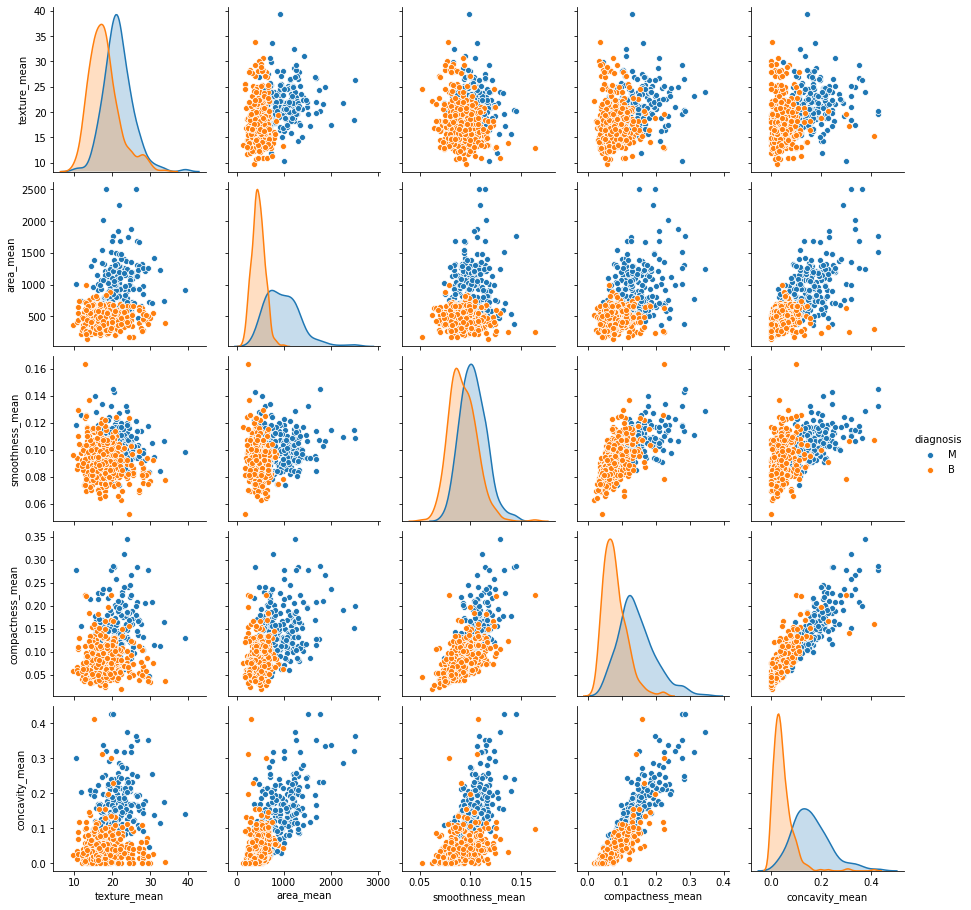

In [261]:
sns.pairplot(dataset, hue='diagnosis', vars=['texture_mean','area_mean', 'smoothness_mean','compactness_mean','concavity_mean'])

Based on the analysis we have above, i deleted radius and paramter and kept area as the varible.
The subplots above display more information about the correlations between the variables

* In terms of texture_mean and smoothness_mean there is no distinct difference between benign and malignant cancer
* Malignant cancer tends to have bigger area_mean, compactness_meana and concavity_mean

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

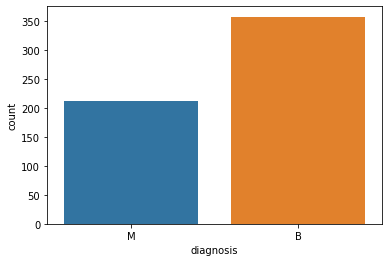

In [262]:
sns.countplot(dataset['diagnosis'])

This plot above shows that 357 are labeled as B (benign) and 212 as M (malignant)

This scatter plot reminds us that benign cancer tends to have smaller area_mean but there is no visible difference in the range of smoothness_mean between benign and malignant cancer

<AxesSubplot:>

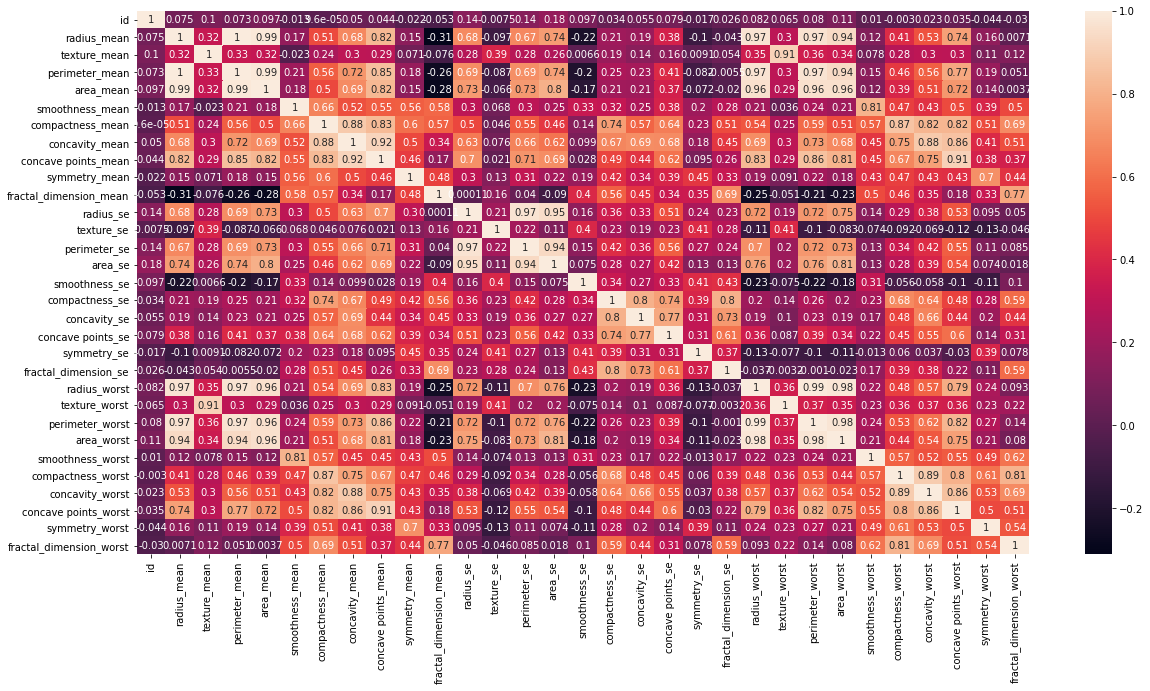

In [263]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(), annot=True)

## Preprocessing the dataset


* Split the dataset
* Encode the dependent variable
* Feature Scaling

In [264]:
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [265]:
X = dataset.drop(['diagnosis','radius_mean','perimeter_mean'], axis=1)
y = dataset['diagnosis']

In [270]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=5)

In [271]:
X_train

,id,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
306,89344,15.82,537.3,0.08511,0.05251,0.001461,0.003261,0.1632,0.05894,0.1903,...,14.41,20.45,92.00,636.9,0.11280,0.1346,0.01120,0.02500,0.2651,0.08385
410,905502,17.57,399.8,0.08858,0.05313,0.027830,0.021000,0.1601,0.05913,0.1916,...,13.05,36.32,85.07,521.3,0.14530,0.1622,0.18110,0.08698,0.2973,0.07745
197,877159,21.84,1024.0,0.07371,0.08642,0.110300,0.057780,0.1770,0.05340,0.6362,...,19.76,24.70,129.10,1228.0,0.08822,0.1963,0.25350,0.09181,0.2369,0.06558
376,901315,20.22,338.3,0.09073,0.16600,0.228000,0.059410,0.2188,0.08450,0.1115,...,10.85,22.82,76.51,351.9,0.11430,0.3619,0.60300,0.14650,0.2597,0.12000
244,884180,23.50,1155.0,0.10270,0.15580,0.204900,0.088860,0.1978,0.06000,0.5243,...,21.65,30.53,144.90,1417.0,0.14630,0.2968,0.34580,0.15640,0.2920,0.07614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,844981,21.82,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,0.3063,...,15.49,30.73,106.20,739.3,0.17030,0.5401,0.53900,0.20600,0.4378,0.10720
73,859983,15.79,584.1,0.10070,0.12800,0.077890,0.050690,0.1662,0.06566,0.2787,...,16.57,20.86,110.30,812.4,0.14110,0.3542,0.27790,0.13830,0.2589,0.10300
400,90439701,21.02,994.0,0.12300,0.25760,0.318900,0.119800,0.2113,0.07115,0.4030,...,20.80,27.78,149.60,1304.0,0.18730,0.5917,0.90340,0.19640,0.3245,0.11980
118,864877,22.91,782.6,0.11550,0.17520,0.213300,0.094790,0.2096,0.07331,0.5520,...,20.19,30.50,130.30,1272.0,0.18550,0.4925,0.73560,0.20340,0.3274,0.12520


In [272]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Selection 

This is the most exciting phase in Applying Machine Learning to any Dataset. Usually Data Scientists use different kinds of Machine Learning algorithms to the large data sets. But, at high level all those different algorithms can be classified in two groups : supervised learning and unsupervised learning.

**_Supervised learning_** : Supervised learning is a type of system in which both input and desired output data are provided. Input and output data are labelled for classification to provide a learning basis for future data processing. Supervised learning problems can be further grouped into Regression and Classification problems.

**_Unsupervised Learning_** : Unsupervised learning is the algorithm using information that is neither classified nor labeled and allowing the algorithm to act on that information without guidance.

A classification problem is when the output variable is a category like filtering emails “spam” or “not spam”, which is the type of the problem we are working today. We have the dependent variable either **M(malignant) or B(benign)** therefore we will use Classification algorithm of supervised learning.


The five classification algorithms we will look at are as follows:
1. Logistic Regression
2. K-Nearest Neighbors (KNN)
3. Support Vector Machine (SVM)
4. Decision Tree
5. Random Forest



In [273]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [274]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))

/Users/rosawang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/rosawang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/rosawang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/rosawang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarnin

LR: 0.975797 (0.030290)
KNN: 0.964831 (0.024525)
SVM: 0.971304 (0.034413)
DT: 0.927391 (0.034214)


/Users/rosawang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.947053 (0.046810)


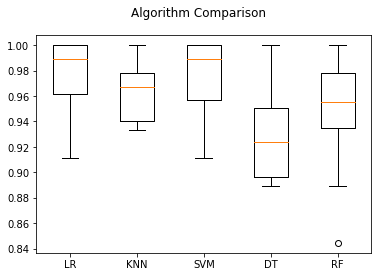

In [275]:
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=0)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We've compared 5 different models and the best accuracy was approximately 97% which was achived by using LogisticRegression model 

In [276]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
cm


array([[65,  1],
       [ 2, 46]])

<AxesSubplot:>

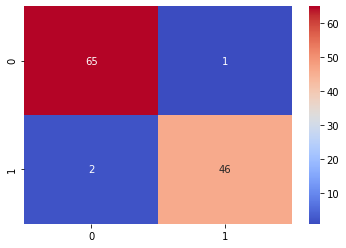

In [277]:
sns.heatmap(cm, cmap='coolwarm',annot=True)

In [278]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           B       0.97      0.98      0.98        66
           M       0.98      0.96      0.97        48

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

